In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def ackley(x):
    d = len(x)
    a = 20
    b = 0.2
    c = 2 * np.pi
    first_sum = np.sum(np.square(x))
    second_sum = np.sum(np.cos(np.multiply(c, x)))
    return -a * np.exp(-b * np.sqrt(first_sum / d)) - np.exp(second_sum / d) + a + np.exp(1)

In [41]:
n = 5
bounds = [(-32, 32) for _ in range(n)]

In [42]:
class Particle:

    def __init__(self, objective, bounds, w, c1, c2):

        self.lower_bounds = bounds[0][0]
        self.upper_bounds = bounds[0][1]
        self.position = np.random.uniform(self.lower_bounds, self.upper_bounds, len(bounds))
        self.velocity = np.random.uniform(-1, 1, len(bounds))

        self.bestPosition = self.position.copy()
        self.currentValue = objective(self.position)
        self.bestValue = objective(self.bestPosition)
        
        self.objective = objective
        self.bounds = bounds
        self.w = w
        self.c1 = c1
        self.c2 = c2

    def updatePosition(self, globalBestPosition, globalBestValue):
        self.position = np.clip(self.position + self.velocity,
                                self.lower_bounds,
                                self.upper_bounds)

        self.currentValue = self.objective(self.position)

        if self.currentValue < self.bestValue:
            self.bestValue = self.currentValue
            self.bestPosition = self.position.copy()

            if self.currentValue < globalBestValue:
                globalBestValue = self.currentValue
                globalBestPosition = self.position.copy()

        return globalBestPosition, globalBestValue

    def updateVelocity(self, globalBestPosition):
        if globalBestPosition is None:
            globalBestPosition = self.bestPosition.copy()
            
        cognitive_velocity = self.bestPosition - self.position
        social_velocity = globalBestPosition - self.position

        r_p = np.random.random(len(cognitive_velocity))
        r_s = np.random.random(len(social_velocity))
        
        self.velocity = (r_p * self.c1 * cognitive_velocity +
                         r_s * self.c2 * social_velocity +
                         self.w * self.velocity)

In [43]:
def pso(numParticles, iters):
    swarm = [Particle(ackley, bounds, 0.75, 1, 2) for _ in range(numParticles)]

    globalBestPosition = None
    globalBestValue = float('inf')

    bestValues = []

    for _ in range(iters):
        for particle in swarm:
            particle.updateVelocity(globalBestPosition)
            globalBestPosition, globalBestValue = particle.updatePosition(globalBestPosition, globalBestValue)

        bestValues.append(globalBestValue)

    plt.plot(bestValues)
    plt.xlabel('Iteracija')
    plt.ylabel('Vrednost najboljeg rešenja')
    plt.title('Promena vrednosti najboljeg rešenja kroz iteracije')
    plt.show()

    return globalBestPosition, globalBestValue

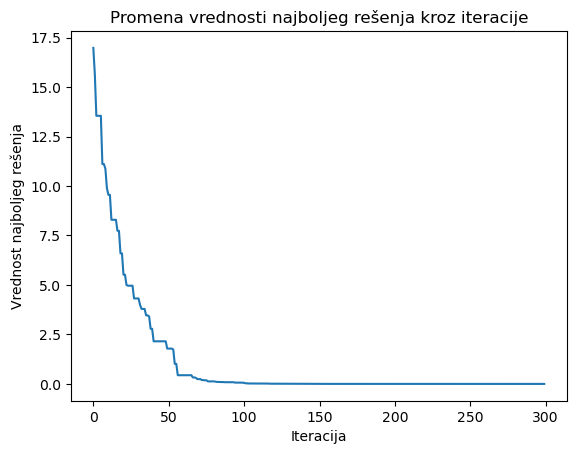

(array([ 4.07870230e-07, -4.18496598e-08,  1.00286364e-07,  1.04060680e-07,
         9.61856375e-08]),
 7.964887491773709e-07)

In [44]:
pso(25, 300)